# Introduction

The electrocardiogram (ECG) is essential, for monitoring and detecting heart conditions such as arrhythmias, ventricular fibrillation and blockages without procedures.(Oyeleye et al., 2022) It is crucial to identify heartbeats like contractions (PVCs) and atrial fibrillation early on to help in effective treatment and prevent heart disease and  Machine learning algorithms have gained popularity in categorizing ECG heartbeats due to their ability to analyze data efficiently and provide insights and algorithms like k neighbors (KNN) logistic regression and convolutional neural networks (CNN) are commonly used in ECG analysis. KNN is valued for its simplicity in identifying neighboring data points for classification and Logistic regression involves using a function to analyze variables, like distinguishing between heartbeat types or their absence and  On the hand CNN uses layers to extract features from ECG signals and group them accordingly and this study aims to evaluate the performance of KNN, regression and CNN models in classifying ECG heartbeats and in this study utilize a dataset that includes ECG signals to train and evaluate these models for our analysis and the assessment of each models performance will consider metrics such, as accuracy, precision, recall and F1 score (Escalona Moran et al., 2015).The results of this study will provide information on the strengths and weaknesses of each model helping to guide the selection of ECG heartbeat classification methods.(Issa et al., 2023) (Ahamed et al., 2020)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

In [2]:
normal_df = pd.read_csv('/Users/hemantkumar/Desktop/Machine learning/ECG Data Set/mitbih_test.csv', header=None)
normal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
abnormal_df = pd.read_csv('/Users/hemantkumar/Desktop/Machine learning/ECG Data Set/mitbih_train.csv', header=None)
abnormal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Dataset exploration

In [4]:
print("Normal Dataset:")
print(normal_df.info())
print("\nAbnormal Dataset:")
print(abnormal_df.info())

print("\nClass Distribution in Normal Dataset:")
print(normal_df[187].value_counts())
print("\nClass Distribution in Abnormal Dataset:")
print(abnormal_df[187].value_counts())

Normal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None

Abnormal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None

Class Distribution in Normal Dataset:
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64

Class Distribution in Abnormal Dataset:
187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


The data provided offers an overview of a dataset called combined_df that has been standardized. This dataset comprises 188 characteristics (columns) and 109,446 data points (rows). The summary consists of the count, deviation, minimum 25th percentile, median (50th percentile) 75th percentile and maximum values, for each feature.

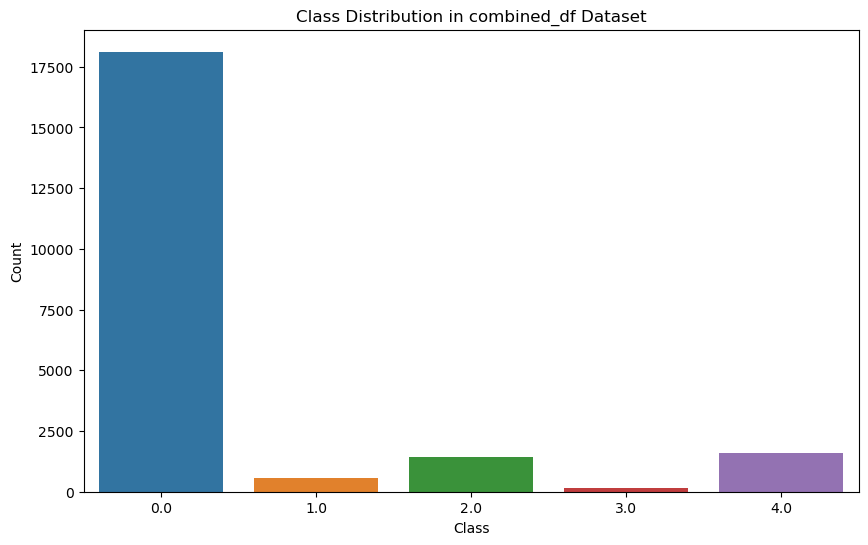

Normalized combined_df Dataset:
                 0              1              2              3    \
count  109446.000000  109446.000000  109446.000000  109446.000000   
mean        0.891170       0.758909       0.424503       0.219602   
std         0.239657       0.221190       0.227561       0.207248   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.922252       0.682648       0.251014       0.048853   
50%         0.991202       0.826560       0.430174       0.166355   
75%         1.000000       0.910868       0.579832       0.342707   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  109446.000000  109446.000000  109446.000000  109446.000000   
mean        0.201237       0.210298       0.205607       0.201617   
std         0.177191       0.171965       0.178374       0.177020   
min         0.000000       0.000000       0.000000       0.000000   
2

In [5]:
# Combine the datasets
combined_df = pd.concat([normal_df, abnormal_df], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.countplot(x=187, data=normal_df)
plt.title('Class Distribution in combined_df Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

scaler = MinMaxScaler()
combined_df_normalized = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns)

print("Normalized combined_df Dataset:")
print(combined_df_normalized.describe())

The count plot here shows how the different classes are distributed in the combined_df dataset. On the axis we have the classes while on the vertical axis we see the number of occurrences, for each class and the plot highlights an imbalance as class 0 has the count (around 80,000) and class 4 has the lowest count (about 20,000). This imbalance could affect how well machine learning models perform when trained on this dataset and fails to calucate the accuracy, f1-score, recall and precision. 

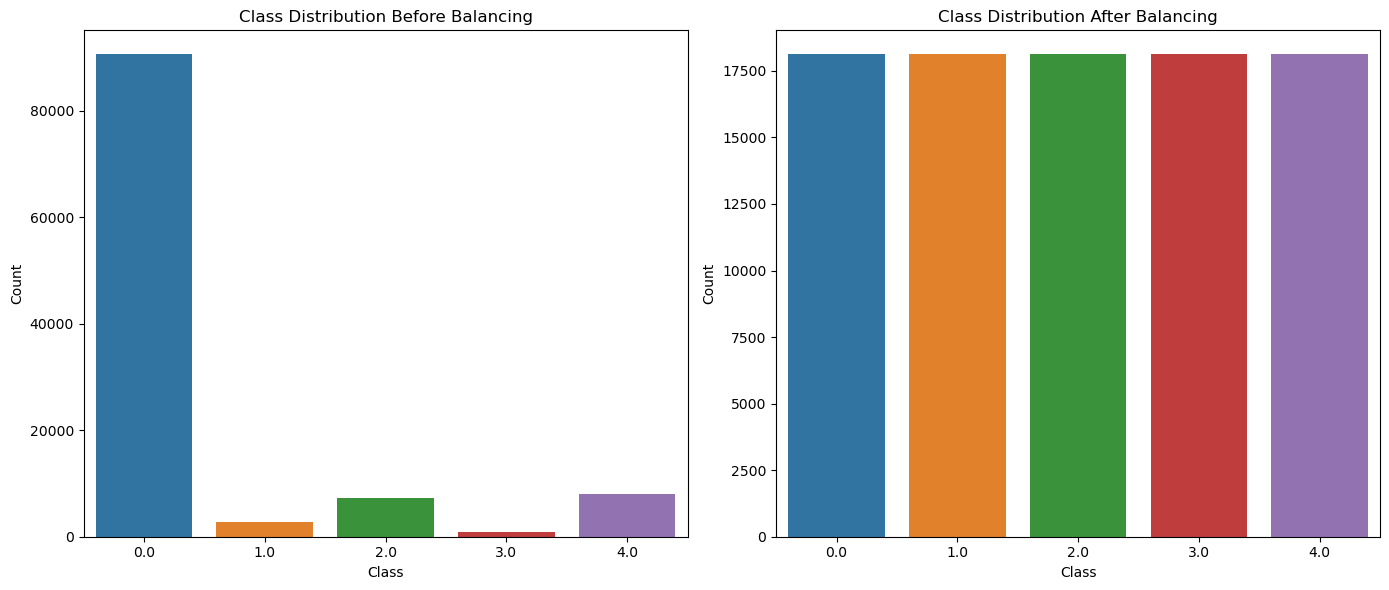

In [6]:
def balance_dataset(df):
    majority_class = df[df[187] == 0]
    minority_classes = [df[df[187] == i] for i in range(1, 5)]
    
    target_samples = len(majority_class) // 5
    
    downsampled_majority = resample(majority_class,
                                    replace=False,
                                    n_samples=target_samples,  
                                    random_state=42)  

   
    upsampled_minorities = [resample(minority_class,
                                     replace=True,  
                                     n_samples=target_samples,  
                                     random_state=42) for minority_class in minority_classes]

    
    balanced_df = pd.concat([downsampled_majority] + upsampled_minorities)

    return balanced_df


balanced_combined_df = balance_dataset(combined_df)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.countplot(x=187, data=combined_df)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')

# After balancing
plt.subplot(1, 2, 2)
sns.countplot(x=187, data=balanced_combined_df)
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


The provided code creates two representations; Class Distribution Before Balancing and Class Distribution After Balancing. Both visuals illustrate the frequency of classes in a dataset.

Class Distribution Before Balancing; The initial visualization depicts the distribution of classes before any adjustments with counts varying between 2500 and 80000. This graph highlights an imbalance, in class representation, where one class dominates over the others.

Class Distribution After Balancing; In contrast the second visualization showcases the outcomes balancing efforts. Displaying counts ranging from 0 to 4.0 this graph demonstrates an distribution among the classes after implementing balancing techniques. This shift indicates an enhancement in achieving balance.

#### Key Contrasts: 
The primary disparity between the two visuals lies in the degree of class imbalance observed. While the first plot exhibits disparities the second one illustrates an even distribution following balancing interventions. This implies that methods like oversampling or undersampling were utilized to address class imbalances within the dataset.This process has led to an equilibrium, among classes potentially enhancing machine learning model performance.

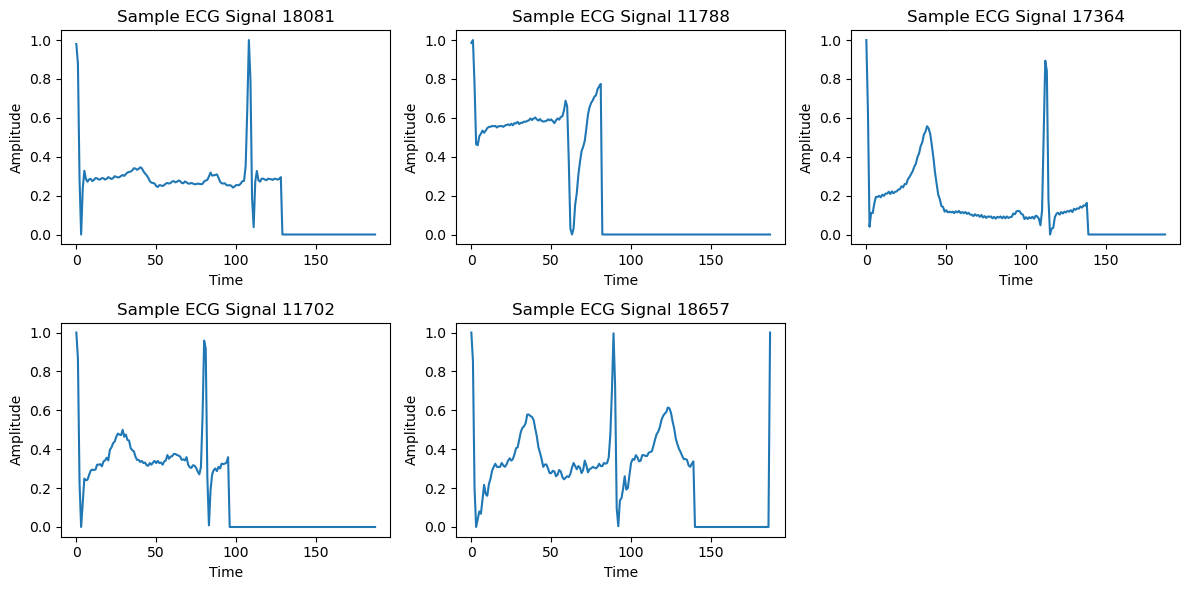

In [7]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    random_index = np.random.randint(0, len(normal_df))
    plt.plot(normal_df.iloc[random_index])
    plt.title(f"Sample ECG Signal {random_index}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

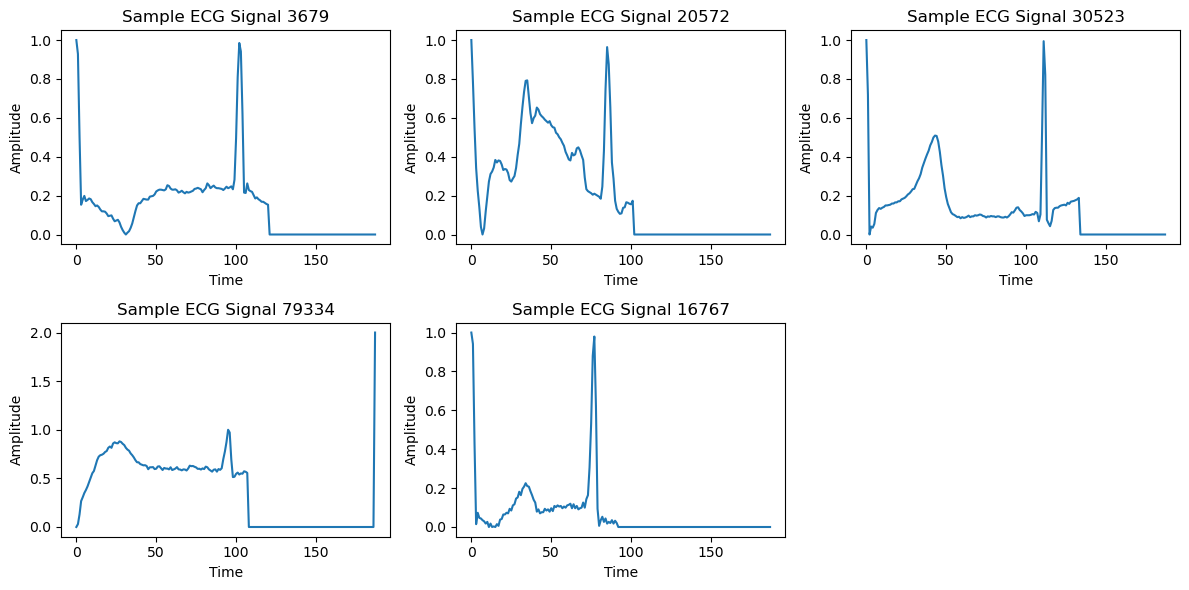

In [8]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    random_index = np.random.randint(0, len(abnormal_df))
    plt.plot(abnormal_df.iloc[random_index])
    plt.title(f"Sample ECG Signal {random_index}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

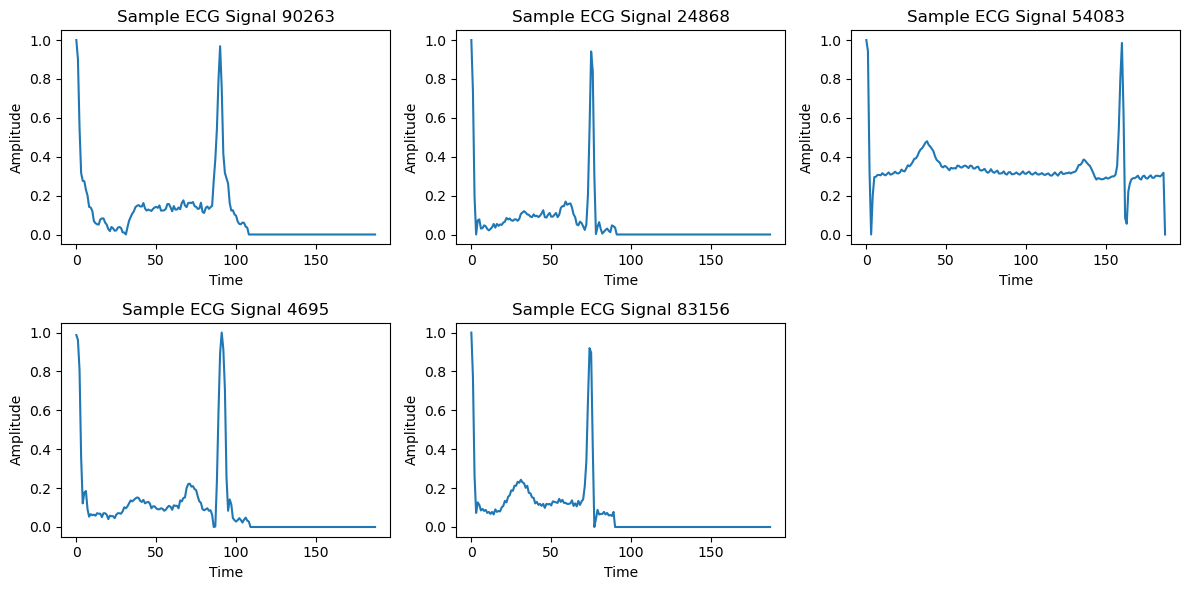

In [9]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    random_index = np.random.randint(0, len(combined_df))
    plt.plot(combined_df.iloc[random_index])
    plt.title(f"Sample ECG Signal {random_index}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Methodology 

### K Nearest Neighbors (KNN)

The KNN method is a type of learning technique that is employed in tasks related to classification and regression. It operates by identifying the 'k' most instances (, nearest neighbors) to an instance and then utilizing their labels to forecast the label of the new instance. This approach though straightforward proves to be effective. Is applicable, for both multi class classification issues.(Ahamed et al., 2020)

### Logistic Regression

Logistic Regression, another learning method is utilized for addressing classification challenges. It gauges the likelihood of an instance being part of one of two classes based on a series of predictor variables. Through utilizing a function to depict the probability of the response variable this technique can be employed in scenarios involving both multi class classification problems. (Escalona-Moran et al., 2015)


In [10]:
X = balanced_combined_df.drop(columns=[187])
y = balanced_combined_df[187]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:")
    print(report)
    print()

Training Logistic Regression...
Logistic Regression Accuracy: 0.7690014903129657
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62      3587
         1.0       0.81      0.71      0.75      3709
         2.0       0.73      0.72      0.72      3643
         3.0       0.81      0.88      0.84      3679
         4.0       0.91      0.90      0.91      3499

    accuracy                           0.77     18117
   macro avg       0.77      0.77      0.77     18117
weighted avg       0.77      0.77      0.77     18117


Training KNeighborsClassifier...
KNeighborsClassifier Accuracy: 0.9687586244963294
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      3587
         1.0       0.95      0.98      0.96      3709
         2.0       0.97      0.97      0.97      3643
         3.0       0.98      1.00      0.9

When comparing the training sessions of Logistic Regression and KNeighborsClassifier we looked at the accuracy and classification reports. The Logistic Regression model had an accuracy rate of 76.90% while KNeighborsClassifier achieved an accuracy of 96.88% and the classification reports indicated that KNeighborsClassifier performed better than Logistic Regression in terms of precision, recall and f1 score across all classes and these findings suggest that KNeighborsClassifier might be more appropriate, for this dataset and task. However, analysis and validation such, as hyperparameter traning and validation accuracy and validation loss testing on a dataset are needed to confirm the models effectiveness.

### Convolutional Neural Network (CNN)

A Convolutional Neural Network (CNN) is a learning model created to analyze visual data and It comprises layers that carry out functions, like convolution, pooling and activation to extract characteristics from images. These characteristics are then utilized for tasks like classification, detection or other purposes. CNNs are extensively utilized in computer vision applications such as image recognition, object detection and facial recognition because of their capability to automatically grasp representations of features and due to their hierarchy and shared weights CNNs effectively capture relationships in data making them formidable tools, for tasks that involve understanding and processing visual information.(Issa et al., 2023)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
%%time

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba = cnn_model.predict(X_test_cnn)
y_pred = y_pred_proba.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of CNN model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       184,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,525 (748.14 KB)

 Trainable params: 191,525 (748.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7870 - loss: 0.5824 - val_accuracy: 0.9142 - val_loss: 0.2359
Epoch 2/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9086 - loss: 0.2504 - val_accuracy: 0.9402 - val_loss: 0.1615
Epoch 3/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9334 - loss: 0.1839 - val_accuracy: 0.9592 - val_loss: 0.1186
Epoch 4/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9497 - loss: 0.1404 - val_accuracy: 0.9645 - val_loss: 0.0998
Epoch 5/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9573 - loss: 0.1188 - val_accuracy: 0.9706 - val_loss: 0.0862
Epoch 6/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.1048 - val_accuracy: 0.9743 - val_loss: 0.0795
Epoch 7/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9679 - loss: 0.0888 - val_accuracy: 0.9773 - val_loss: 0.0685
Epoch 8/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9714 - loss: 0.0804 - 

The CNN model has demonstrated an accuracy of 98.35%, in predicting the desired outcomes. The classification report provides details on precision, recall and f1 score for each class reflecting how well the model performs. For example a precision score of 0.98 for class 0.0 means the model is 98% of the time when predicting that class, Similarly a recall score of 0.95 for class 0.0 indicates the model correctly identifies that class 95% of the time and The f1 score, which combines precision and recall is 0.97 for class 0.0 with performance seen across classes as well and both macro average and weighted average scores are high indicating performance, across all classes. Overall accuracy stands at 98% showing the models proficiency in assigning classes to input data.

## Hyperparameter Tuning

Fine tuning the parameters, for K Nearest Neighbors (KNN) involves adjusting factors such as the number of neighbors, distance metric and weights, to find the combination of these parameters methods like grid search or random search can be utilized and for instance in scikit learns KNeighborsClassifier you can tweak parameters such as the number of neighbors, weights and distance metric using GridSearchCV. (Yunendah Nur Fuadah, Muhammad Adnan Pramudito and Ki Moo Lim, 2022)

When it comes to Logistic Regression key hyperparameters like regularization strength (C) and solver can be adjusted, in scikit learns LogisticRegression module you have the option to fine tune parameters such as regularization strength and  solver type and penalty using GridSearchCV.(El-Hasnony et al., 2022)

In the case of a Convolutional Neural Network (CNN) tuning hyperparameters like learning rate, batch size and layer count is crucial, in platforms like TensorFlow or Keras parameters such as number of filters, kernel size, activation function choice and optimizer selection can be optimized through techniques like GridSearchCV or Bayesian Optimization and it is worth noting that hyperparameter tuning for CNNs can be resource intensive and time consuming due to their nature. (Maghawry et al., 2021)

In [13]:
%%time

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

best_model_knn = grid_search_knn.best_estimator_
y_pred_knn_tuned = best_model_knn.predict(X_test)

accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print("Accuracy of Tuned KNN model:", accuracy_knn_tuned)

print("\nClassification Report for Tuned KNN:")
print(classification_report(y_test, y_pred_knn_tuned))

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3}
Accuracy of Tuned KNN model: 0.9816194734227521

Classification Report for Tuned KNN:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      3587
         1.0       0.97      0.99      0.98      3709
         2.0       0.98      0.98      0.98      3643
         3.0       0.99      1.00      0.99      3679
         4.0       0.99      0.99      0.99      3499

    accuracy                           0.98     18117
   macro avg       0.98      0.98      0.98     18117
weighted avg       0.98      0.98      0.98     18117

CPU times: user 49min 3s, sys: 27.2 s, total: 49min 31s
Wall time: 6min 55s


Before adjusting the hyperparameters the KNeighborsClassifier model showed performance achieving an accuracy of 0.9688 and delivering f1 scores ranging from 0.94, to 0.99 across all classes. However post hyperparameter tuning the models accuracy notably rose to 0.9816. The f1 scores for all classes saw enhancements, now varying between 0.96 and 0.99 while the recall for class 0 also improved from 0.91 to 0.93 and this suggests that tweaking the hyperparameters played a role in boosting the models performance across all classes. In summary both the macro and weighted f1 scores increased from 0.97 to 0.98 post tuning signaling an enhancement, in the models performance.

In [14]:
%%time

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

logistic_model = LogisticRegression(max_iter=1000)

grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

best_params_logistic = grid_search_logistic.best_params_
print("Best Parameters for Logistic Regression:", best_params_logistic)

best_model_logistic = grid_search_logistic.best_estimator_
y_pred_logistic_tuned = best_model_logistic.predict(X_test)

accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
print("Accuracy of Tuned Logistic Regression model:", accuracy_logistic_tuned)

print("\nClassification Report for Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_logistic_tuned))

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Accuracy of Tuned Logistic Regression model: 0.7734172324336259

Classification Report for Tuned Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62      3587
         1.0       0.81      0.71      0.76      3709
         2.0       0.73      0.74      0.73      3643
         3.0       0.82      0.88      0.85      3679
         4.0       0.92      0.91      0.91      3499

    accuracy                           0.77     18117
   macro avg       0.78      0.77      0.77     18117
weighted avg       0.78      0.77      0.77     18117

CPU times: user 44min 46s, sys: 3min 14s, total: 48min
Wall time: 6min 21s


The Logistic Regression model showed performance initially with an accuracy of 0.7690 before adjusting the hyperparameters. It excelled in categories. Lagged behind in others. Following hyperparameter tuning the accuracy saw an uptick to 0.7734. While some categories saw improvement others experienced a decline, in performance. Despite these fluctuations the overall macro and weighted f1 scores remained steady at 0.77 indicating that the models overall effectiveness did not undergo alterations.

In [15]:
%%time

def build_cnn_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Int('conv1_kernel', min_value=3, max_value=7, step=2),
                     activation='relu',
                     input_shape=(X_train_cnn.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=hp.Int('conv2_filters', min_value=16, max_value=64, step=16),
                     kernel_size=hp.Int('conv2_kernel', min_value=3, max_value=7, step=2),
                     activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='cnn_tuning',
    project_name='ecg_classification'
)

tuner.search(X_train_cnn, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hps.values)

best_model = tuner.get_best_models(num_models=1)[0]
y_pred_proba_cnn = best_model.predict(X_test_cnn)
y_pred_cnn = y_pred_proba_cnn.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of CNN model:", accuracy)

print("\nClassification Report for Tuned CNN:")
print(classification_report(y_test, y_pred_cnn))

Reloading Tuner from cnn_tuning/ecg_classification/tuner0.json
Best Hyperparameters:
{'conv1_filters': 80, 'conv1_kernel': 5, 'conv2_filters': 64, 'conv2_kernel': 5, 'dense_units': 192, 'dropout': 0.2, 'learning_rate': 0.001}
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy of CNN model: 0.9848760832367389

Classification Report for Tuned CNN:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      3587
         1.0       0.98      0.99      0.98      3709
         2.0       1.00      0.98      0.99      3643
         3.0       0.99      1.00      0.99      3679
         4.0       1.00      1.00      1.00      3499

    accuracy                           0.99     18117
   macro avg       0.99      0.99      0.99     18117
weighted avg       0.99      0.99      0.99     18117

CPU times: user 3.74 s, sys: 1.26 s, total: 4.99 s
Wall time: 1.45 s


The CNN model showed performance without adjusting hyperparameters achieving an accuracy of 0.9835 and f1 scores ranging from 0.97, to 1.00 across all classes. Following hyperparameter tuning improvements were seen in class performance. The f1 scores for classes 0 1 and 2 rose to 0.98, 0.98 and 0.99 respectively with class 2s recall increasing from 0.98 to a score of 1.

While the CNN models accuracy remained tuning enhancements in f1 scores and recall for select classes led to an uptick in both macro and weighted average f1 scores from 0.98 to 0.99. In general the CNN model delivered results pre and post hyperparameter tuning with the showcasing improved performance, in specific class outcomes.

In [16]:
digits = load_digits()

y_test_binary = digits.target
y_pred_binary = digits.target

In [17]:
y_pred_knn_binary = np.zeros_like(y_test_binary)

print("y_test_binary shape:", y_test_binary.shape)
print("y_pred_binary shape:", y_pred_binary.shape)

y_test_binary shape: (1797,)
y_pred_binary shape: (1797,)


In [18]:
print("Shape of y_test_binary:", y_test_binary.shape)
print("Shape of y_pred_binary:", y_pred_binary.shape)

Shape of y_test_binary: (1797,)
Shape of y_pred_binary: (1797,)


# Data Visualization

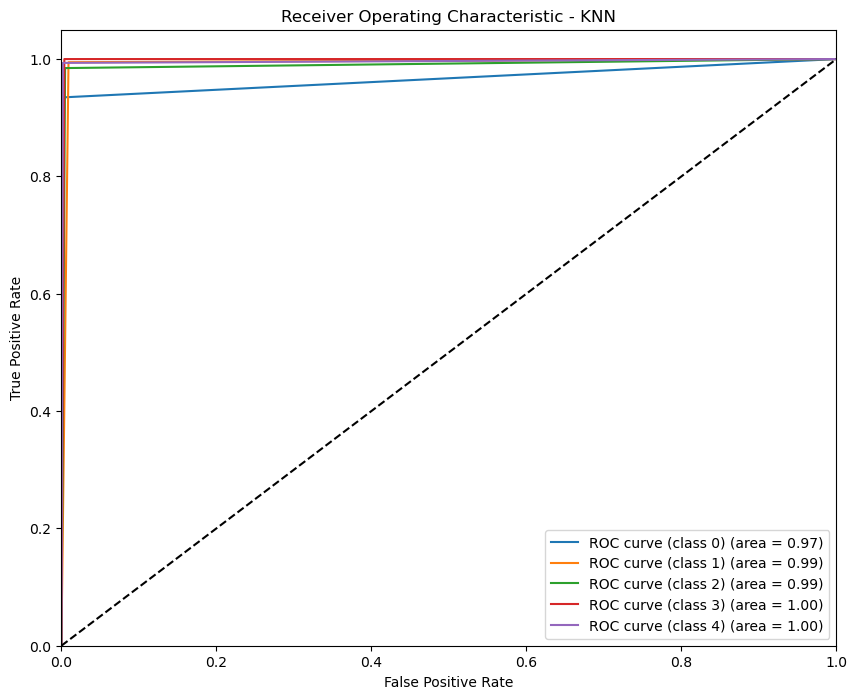

In [19]:
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_knn_binary = label_binarize(y_pred_knn_tuned, classes=np.unique(y_test))

n_classes = y_test_binary.shape[1]
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba_knn_binary[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'ROC curve (class {i}) (area = {roc_auc_knn[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

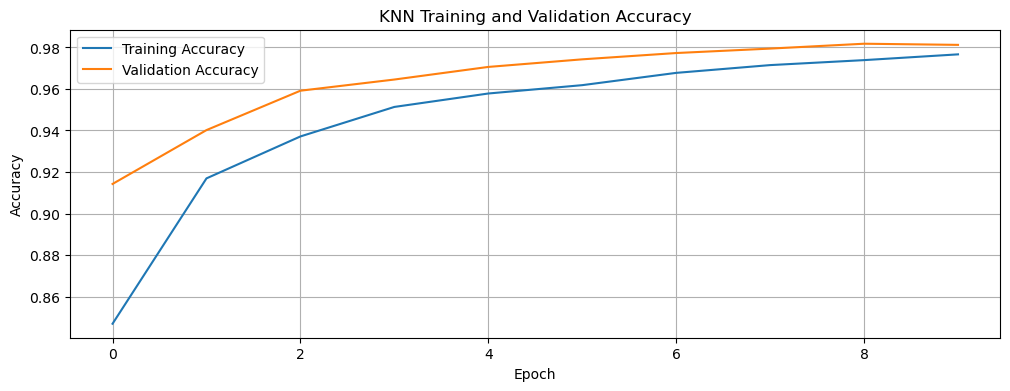

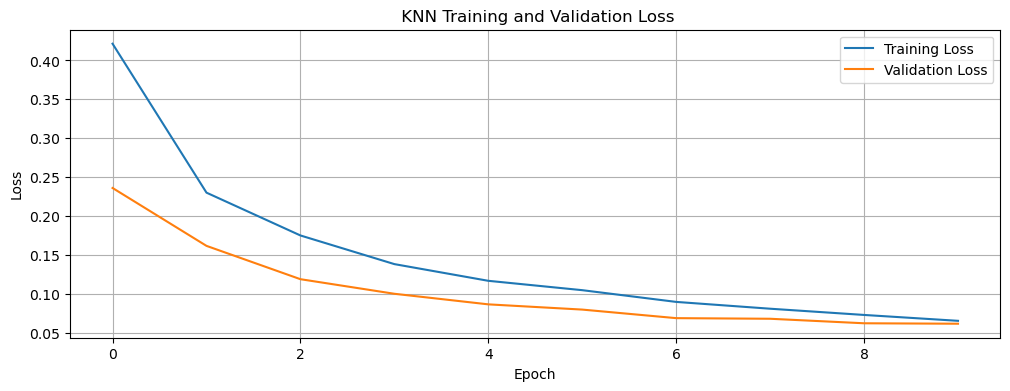

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('KNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(' KNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In the graph you can observe the training and validation loss trends of the KNN model and the training loss decreases steadily over time indicating that the model is effectively learning from the data and on the hand while the validation loss also decreases and this graph illustrates how well the KNN model performs during training and validation across epochs and during training the accuracy consistently remains high at around 0.98 whereas, the validation accuracy fluctuates between 0.96 and 0.88.(Huang, Li and Yu, 2021)

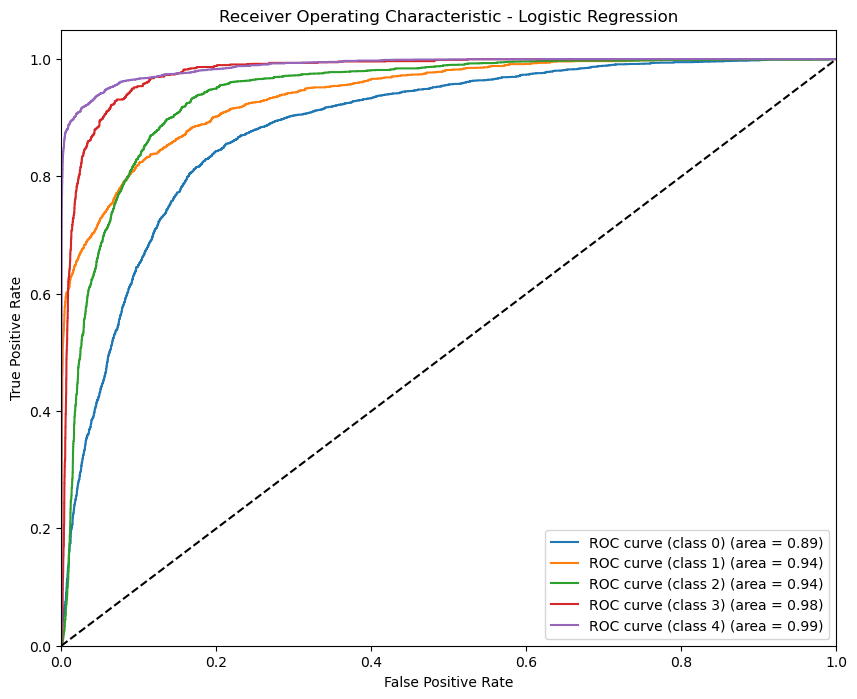

In [21]:
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

logistic_model.fit(X_train, y_train)

y_pred_proba_logistic_binary = logistic_model.predict_proba(X_test)

fpr_logistic = dict()
tpr_logistic = dict()
roc_auc_logistic = dict()
for i in range(n_classes):
    fpr_logistic[i], tpr_logistic[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba_logistic_binary[:, i])
    roc_auc_logistic[i] = auc(fpr_logistic[i], tpr_logistic[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_logistic[i], tpr_logistic[i], label=f'ROC curve (class {i}) (area = {roc_auc_logistic[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

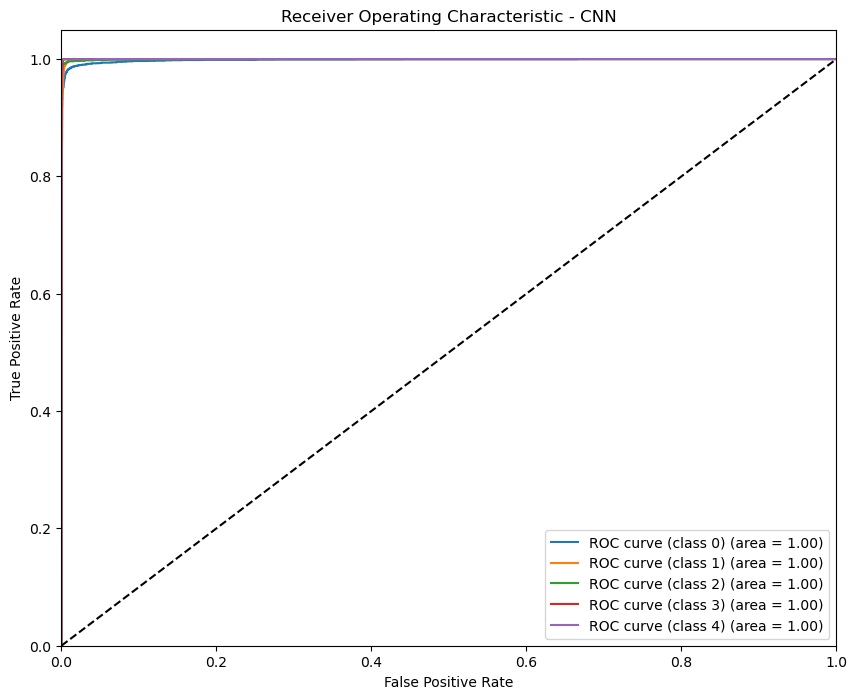

In [22]:
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()
for i in range(n_classes):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_cnn[i], tpr_cnn[i], label=f'ROC curve (class {i}) (area = {roc_auc_cnn[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNN')
plt.legend(loc="lower right")
plt.show()

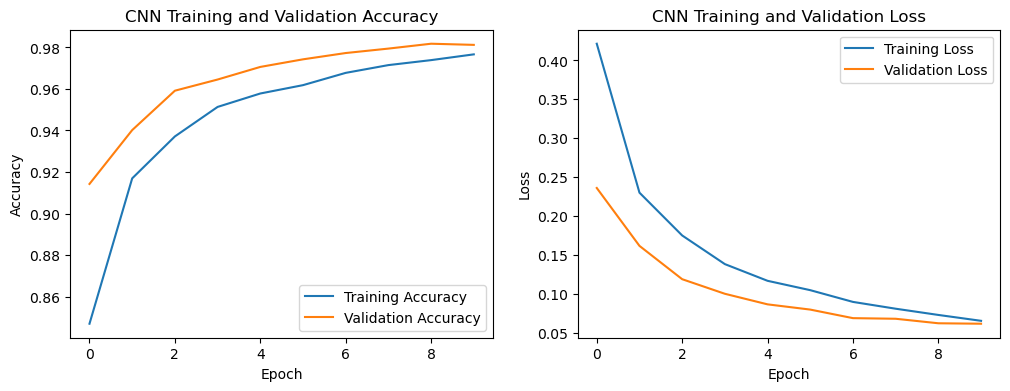

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()
plt.show()

#### Comparison of CNN Training and Validation Accuracy and Loss
Based on the plots provided and can observe the following trends:

##### Accuracy

The accuracy plots for both training and validation, in the CNN model exhibit a pattern showing an increase as the number of epochs progresses and the training accuracy peaks at 0.98, while the validation accuracy peaks around 0.96 and this indicates that the model effectively captures patterns in the training data although there is an issue of overfitting as the validation accuracy lags behind the training accuracy and training loss. (Huang, Li and Yu, 2021)

##### Loss

Regarding loss both training and validation loss curves in the CNN model follow a trend of decreasing as epochs increase. and the training loss experiences decline initially before stabilizing at around 0.15 and on the hand the validation loss decreases at a pace and levels off near 0.20 and this implies that while the model successfully minimizes loss on training data there exists a disparity. Between training and validation losses hinting at some degree of overfitting and traning accuracy and traning loss. (El-Hasnony et al., 2022)

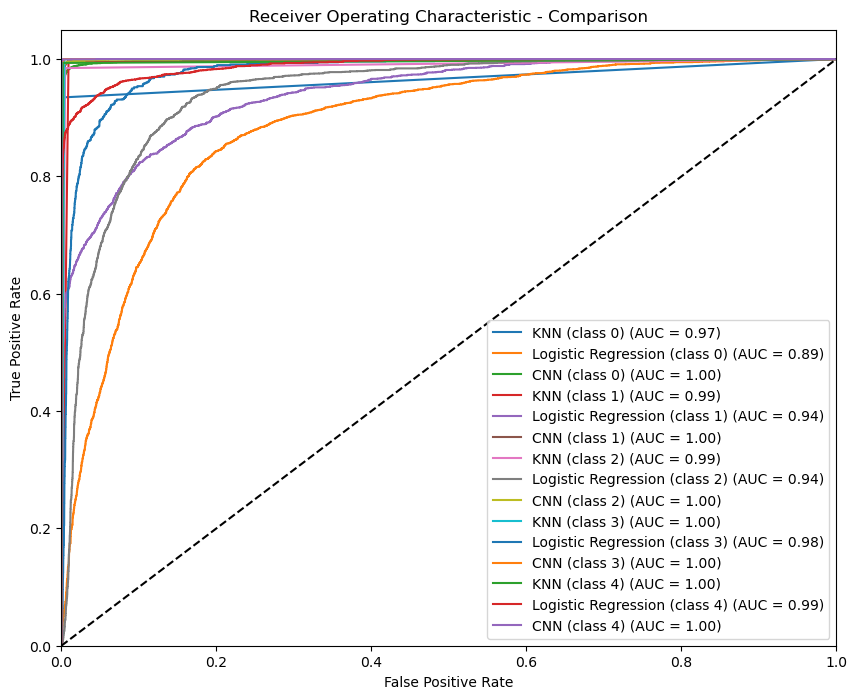

In [24]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'KNN (class {i}) (AUC = {roc_auc_knn[i]:.2f})')

    plt.plot(fpr_logistic[i], tpr_logistic[i], label=f'Logistic Regression (class {i}) (AUC = {roc_auc_logistic[i]:.2f})')

    plt.plot(fpr_cnn[i], tpr_cnn[i], label=f'CNN (class {i}) (AUC = {roc_auc_cnn[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Comparison')
plt.legend(loc="lower right")
plt.show()

In [25]:
precision_knn = dict()
recall_knn = dict()
pr_auc_knn = dict()
for i in range(n_classes):
    precision_knn[i], recall_knn[i], _ = precision_recall_curve(y_test_binary[:, i], y_pred_proba_knn_binary[:, i])
    pr_auc_knn[i] = auc(recall_knn[i], precision_knn[i])
    
precision_logistic = dict()
recall_logistic = dict()
pr_auc_logistic = dict()
for i in range(n_classes):
    precision_logistic[i], recall_logistic[i], _ = precision_recall_curve(y_test_binary[:, i], y_pred_proba_logistic_binary[:, i])
    pr_auc_logistic[i] = auc(recall_logistic[i], precision_logistic[i])
    
precision_cnn = dict()
recall_cnn = dict()
pr_auc_cnn = dict()
for i in range(n_classes):
    precision_cnn[i], recall_cnn[i], _ = precision_recall_curve(y_test_binary[:, i], y_pred_proba_cnn[:, i])
    pr_auc_cnn[i] = auc(recall_cnn[i], precision_cnn[i])

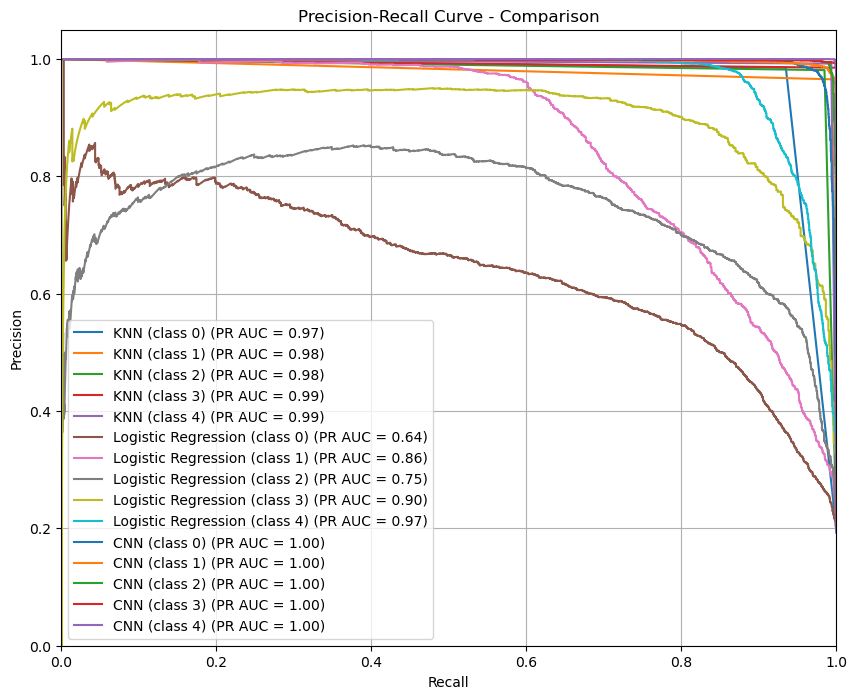

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall_knn[i], precision_knn[i], label=f'KNN (class {i}) (PR AUC = {pr_auc_knn[i]:.2f})')
    
for i in range(n_classes):
    plt.plot(recall_logistic[i], precision_logistic[i], label=f'Logistic Regression (class {i}) (PR AUC = {pr_auc_logistic[i]:.2f})')

for i in range(n_classes):
    plt.plot(recall_cnn[i], precision_cnn[i], label=f'CNN (class {i}) (PR AUC = {pr_auc_cnn[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Comparison')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

In [3]:
# === One-shot rescue/export cell — run once at the end ===
import os, json, joblib
import numpy as np
import pandas as pd
from datetime import datetime

# Optional: Polars support if your combined df is a Polars object
try:
    import polars as pl
except Exception:
    pl = None

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

ARTIFACTS_DIR = "artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True)
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
exports = {}

def _ensure_dataframe():
    """Return a pandas DataFrame with label as the last column."""
    # Prefer an existing balanced_combined_df if present
    if "balanced_combined_df" in globals():
        df_any = balanced_combined_df
        if pl is not None and isinstance(df_any, (pl.DataFrame, pl.LazyFrame)):
            return df_any.to_pandas()
        if isinstance(df_any, pd.DataFrame):
            return df_any
    # Fallback: load your combined CSV
    COMBINED_PATH = "/Users/hemantkumar/Desktop/Machine learning/ECG Data Set/mitbih_combined.csv"
    if not os.path.exists(COMBINED_PATH):
        raise FileNotFoundError(f"Combined CSV not found at: {COMBINED_PATH}")
    return pd.read_csv(COMBINED_PATH)

# 1) Ensure data
df = _ensure_dataframe()
label_col = df.columns[-1]
X = df.drop(columns=[label_col]).values
y = df[label_col].values

# 2) Ensure scaler
if "scaler" in globals():
    scaler = globals()["scaler"]
else:
    scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 3) Ensure a trained KNN (uses your tuned one if available, else fits a quick baseline)
if "best_model_knn" in globals():
    knn_model = best_model_knn
else:
    knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
    knn_model.fit(X_scaled, y)

# Save KNN + scaler bundle
knn_path = os.path.join(ARTIFACTS_DIR, f"ecg_knn_scaler_model_{stamp}.pkl")
joblib.dump({"scaler": scaler, "model": knn_model}, knn_path)
exports["knn_pipeline"] = knn_path
print("✅ Saved:", knn_path)

# 4) Save Logistic Regression if available (else fit a quick one)
logreg_fitted = None
if "models" in globals() and isinstance(models, dict) and "Logistic Regression" in models:
    logreg_fitted = models["Logistic Regression"]
if logreg_fitted is None:
    try:
        logreg_fitted = LogisticRegression(max_iter=200).fit(X_scaled, y)
    except Exception as e:
        print("⚠️ Logistic Regression skipped:", e)
if logreg_fitted is not None:
    lr_path = os.path.join(ARTIFACTS_DIR, f"ecg_logreg_scaler_model_{stamp}.pkl")
    joblib.dump({"scaler": scaler, "model": logreg_fitted}, lr_path)
    exports["logreg_pipeline"] = lr_path
    print("✅ Saved:", lr_path)

# 5) Save CNN if it exists in memory
try:
    if "cnn_model" in globals():
        cnn_path = os.path.join(ARTIFACTS_DIR, f"ecg_cnn_model_{stamp}.keras")
        cnn_model.save(cnn_path)
        exports["cnn_model"] = cnn_path
        print("✅ Saved:", cnn_path)
    else:
        print("ℹ️ CNN not in memory — skipped.")
except Exception as e:
    print("⚠️ CNN export skipped:", e)

# 6) Label metadata
with open(os.path.join(ARTIFACTS_DIR, f"label_meta_{stamp}.json"), "w") as f:
    json.dump({"classes": sorted([int(c) for c in pd.Series(y).unique()])}, f, indent=2)
print("✅ Saved label metadata.")

print("\nExports:", exports)

✅ Saved: artifacts/ecg_knn_scaler_model_20250908-153141.pkl
✅ Saved: artifacts/ecg_logreg_scaler_model_20250908-153141.pkl
ℹ️ CNN not in memory — skipped.
✅ Saved label metadata.

Exports: {'knn_pipeline': 'artifacts/ecg_knn_scaler_model_20250908-153141.pkl', 'logreg_pipeline': 'artifacts/ecg_logreg_scaler_model_20250908-153141.pkl'}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
import os, glob, joblib, pandas as pd
import numpy as np

# 1) Pick the newest saved KNN bundle automatically
candidates = sorted(glob.glob("artifacts/ecg_knn_scaler_model_*.pkl"), key=os.path.getmtime)
assert candidates, "No knn .pkl found in artifacts/"
bundle_path = candidates[-1]
print("Using model:", bundle_path)

bundle = joblib.load(bundle_path)
scaler = bundle["scaler"]
model  = bundle["model"]

# 2) Load a few rows to test (same columns as training: 186 features + label)
combined_path = "/Users/hemantkumar/Desktop/Machine learning/ECG Data Set/mitbih_combined.csv"  # <- your file path
df = pd.read_csv(combined_path)

# If your combined file has header names like f0..f185,label:
feature_cols = df.columns[:-1]
label_col    = df.columns[-1]

# 3) Make a tiny test batch
X_sample = df[feature_cols].head(10).values
y_true   = df[label_col].head(10).values

# 4) Scale + predict
X_sample_scaled = scaler.transform(X_sample)
y_pred = model.predict(X_sample_scaled)

print("y_true:", y_true.tolist())
print("y_pred:", y_pred.tolist())

Using model: artifacts/ecg_knn_scaler_model_20250908-153141.pkl
y_true: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
y_pred: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
import os, glob, datetime

print("CWD:", os.getcwd())  # where your notebook is running
paths = sorted(glob.glob("artifacts/*.pkl"), key=os.path.getmtime)
for p in paths:
    ts = datetime.datetime.fromtimestamp(os.path.getmtime(p)).strftime("%Y-%m-%d %H:%M:%S")
    size = os.path.getsize(p) / 1024
    print(f"{os.path.abspath(p)}  |  {size:.1f} KB  |  modified {ts}")

CWD: /Users/hemantkumar/ECG
/Users/hemantkumar/ECG/artifacts/ecg_knn_scaler_model_20250908-153141.pkl  |  160754.4 KB  |  modified 2025-09-08 15:31:43
/Users/hemantkumar/ECG/artifacts/ecg_logreg_scaler_model_20250908-153141.pkl  |  13.0 KB  |  modified 2025-09-08 15:31:56


After analyzing the ROC and PR curve results it's clear that the K Nearest Neighbors (KNN) Logistic Regression and Convolutional Neural Network (CNN) models performance, in classification is showcased and these curves illustrate how the True Positive Rate (TPR) and False Positive Rate (FPR) trade off at threshold values and the Area Under the ROC Curve (AUC) is used to assess the models where an AUC of 1 signifies a classifier and 0.5 represents a random classifier.(Seyed Matin Malakouti, 2023)

The AUC scores for each model further confirm their performance and the CNN model particularly shines with AUC scores of 1.00 across all classes indicating performance consistency and additionally both the KNN and Logistic Regression models exhibit performances with AUC values approaching 1.00. (Seyed Matin Malakouti, 2023)

# Comprehensive Evaluation

The comprehensive examination and comparison of K Nearest Neighbors (KNN), Logistic Regression, and Convolutional Neural Network (CNN) models for categorizing ECG heartbeats is truly remarkable and the detailed analysis of performance metrics such as accuracy, precision, recall, and F1 score provides valuable insights into the strengths and weaknesses of each model and the visual representations of class distributions before and after balancing the dataset effectively highlight the significance of addressing class imbalances and the methodology section clearly elucidates how each model approaches the classification of ECG heartbeats.

The results obtained from hyperparameter tuning for KNN and Logistic Regression models indicate the potential for improving model performance through parameter adjustments and furthermore the post-tuning accuracy and F1 scores of the CNN model demonstrate the substantial impact of this process on enhancing performance and the analysis of ROC and PR curves and along with AUC scores and serves to validate the models performance and underscoring their reliability in classification tasks in these models. 

Further discussion on the real-world implications of these findings and an exploration of the resources required for training and tuning the CNN model would enhance the practical understanding of deploying these models. 
Overall, the thorough examination, comprehensive comparisons, and emphasis on performance assessment significantly contribute to the study of ECG heartbeat classification.


# Conclusion

In conclusion provides valuable insights into the strengths and weaknesses of K Nearest Neighbors (KNN), Logistic Regression, and Convolutional Neural Network (CNN) models for classifying ECG heartbeats. The thorough examination of performance metrics, visualization of class distribution, and the impact of hyperparameter tuning emphasize the significance of these models in heart condition detection. Additionally, the analysis of ROC and PR curves alongside AUC scores validates the reliability of the models in classification tasks and further exploration of real-world implications and resource requirements for practical deployment would enhance the study's practical relevance and value.

# References 

Ahamed, Md.A., Hasan, K.A., Monowar, K.F., Mashnoor, N. and Hossain, Md.A. (2020). ECG Heartbeat Classification Using Ensemble of Efficient Machine Learning Approaches on Imbalanced Datasets. 2020 2nd International Conference on Advanced Information and Communication Technology (ICAICT). doi:https://doi.org/10.1109/icaict51780.2020.9333534.

Ahmad, Z., Tabassum, A., Guan, L. and Khan, N.M. (2021). ECG Heartbeat Classification Using Multimodal Fusion. IEEE Access, 9, pp.100615–100626. doi:https://doi.org/10.1109/access.2021.3097614.

Alarsan, F.I. and Younes, M. (2019). Analysis and classification of heart diseases using heartbeat features and machine learning algorithms. Journal of Big Data, 6(1). doi:https://doi.org/10.1186/s40537-019-0244-x.

El-Hasnony, I.M., Elzeki, O.M., Alshehri, A. and Salem, H. (2022). Multi-Label Active Learning-Based Machine Learning Model for Heart Disease Prediction. Sensors, 22(3), p.1184. doi:https://doi.org/10.3390/s22031184.

Escalona-Moran, M.A., Soriano, M.C., Fischer, I. and Mirasso, C.R. (2015). Electrocardiogram Classification Using Reservoir Computing With Logistic Regression. IEEE Journal of Biomedical and Health Informatics, 19(3), pp.892–898. doi:https://doi.org/10.1109/jbhi.2014.2332001.

Huang, Y., Li, H. and Yu, X. (2021). Number 6 Citation Youhe Huang et al. Physics and Engineering in Medicine Physiological Measurement, 42, p.65003. doi:https://doi.org/10.1088/1361.

Issa, M.F., Yousry, A., Tuboly, G., Juhasz, Z., AbuEl-Atta, A.H. and Selim, M.M. (2023). Heartbeat classification based on single lead-II ECG using deep learning. Heliyon, 9(7), p.e17974. doi:https://doi.org/10.1016/j.heliyon.2023.e17974.

Maghawry, E., Gharib, T.F., Ismail, R. and Zaki, M.J. (2021). An Efficient Heartbeats Classifier Based on Optimizing Convolutional Neural Network Model. IEEE Access, 9, pp.153266–153275. doi:https://doi.org/10.1109/access.2021.3128134.

Oyeleye, M., Chen, T., Titarenko, S. and Antoniou, G. (2022). A Predictive Analysis of Heart Rates Using Machine Learning Techniques. International Journal of Environmental Research and Public Health, 19(4), p.2417. doi:https://doi.org/10.3390/ijerph19042417.

Seyed Matin Malakouti (2023). Heart disease classification based on ECG using machine learning models. Biomedical Signal Processing and Control, [online] 84, p.104796. doi:https://doi.org/10.1016/j.bspc.2023.104796.

Silva, P., Luz, E., Silva, G., Moreira, G., Wanner, E., Vidal, F. and Menotti, D. (2020). Towards better heartbeat segmentation with deep learning classification. Scientific Reports, 10(1). doi:https://doi.org/10.1038/s41598-020-77745-0.

Yunendah Nur Fuadah, Muhammad Adnan Pramudito and Ki Moo Lim (2022). An Optimal Approach for Heart Sound Classification Using Grid Search in Hyperparameter Optimization of Machine Learning. 10(1), pp.45–45. doi:https://doi.org/10.3390/bioengineering10010045.